In [3]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# 3.	Acronyms
ADC	Analog to Digital Converter
CCD	Charge Coupled Device, aka sensor
REB	Raft Electronics Board
ASPIC	Dual slope integrating ASIC
CABAC	Clock And BiAs Control ASIC
PREG	Power Regulator
RTM	Raft Tower Module
REC	Raft Electronics Crate
FEA	Finite Element Analysis

# Purpose and scope
This note describes an analysis of the thermal control the Raft Tower Modules (RTMs) using the electronics simulation tool Spice. This note is primarily focused on describing how the tool is used and its input assumptions. The most critical analysis results will also be presented.

# The issue
Maintaining the sensor array at the desired temperature and keeping that temperature constant between calibrations is critical to meeting the LSST’s science requirements. Our ability to do this is among the most serious of our outstanding risks. The Science Raft specification calls for a sensor temperature stability of 0.25 K over a twelve hour observing period and a stability of 1 K for the cold plate over that same period. The cryostat specification calls for a stability of 1 K for the cryo plate. The Science Raft specification for the sensor temperature  is –100+-5 C. The cryostat specification calls for a cryo plate temperature of -130 C. 

# The method
NgSpice (a open version of Spice)  is an electronics simulation tool. A thermal system is a perfect analog of an electrical one so PSpice may be used to simulate it. The analog quantities are:
•	Potential in Volts is the analog of absolute temperature in Kelvin.
•	Current in Amperes is the analog of heat flow in Watts. 
•	Capacitance in Farads is the analog of heat capacity in J/K.
•	Resistance in Ohms is the analog of thermal impedance in K/W. 
•	Heat sinks are represented by voltage sources.
•	Heat sources are represented by current sources. 
Large chunks of material are represented as distributed RC networks (very lossy transmission lines) specified by their total heat capacity and their effective end to end thermal impedance. We choose to break these large chunks into 8 equal pieces. The heat capacities are taken from a table derived from a 3D ANSYS simulation. The thermal impedances are inferred from the static thermal solution from that same model as are the resistances that represent the thermal-contact impedances. See the Excel spread sheet, REB_1-D_Model_10-08-2014_revA, from Steve with help from Jessica Li. We entered the description of the system using the schematic capture tool ORCAD Capture. 
More complicated objects and connections are represented by Analog Behavioral Models, i.e., boxes executing algebraic functions. These are used to describe non-conductive (radiative and convective) heat transfer, implement lookup tables representing refrigerators, and perform integration.
The resulting model is a multiply connected 1 D network. Effects included in the model are:
•	All known components in one RTM (3 REBs treated as a single larger one).
•	All radiative heat paths 
•	All conductive heat paths
•	Cryo and cold refrigerator behavior
•	Proportional Integral (PI) control loops ( sensors, cryo-plate, cold plate)
•	Assumes high quality heat shields over the REBs (e.g., gold flashed Cu foil).
Some limitations are:
•	Emissivities are not temperature dependent
•	Heat capacities and resistivities are not temperature dependent
•	Some emissivities are not well known
•	Cryo refrigeration performance may be different
•	Refrigerator performance is not dependent on the ambient temperature.
•	Cannot evaluate differences across the raft as the sensors are treated as one lump.
•	Assumes effects such as radiation from the cryostat are uniform over all RTMs. Differences are estimated to be small. 
•	Also assumes that the full system is 22.3 science rafts, i.e., that the corner rafts are one third of a science raft. This is an underestimate, and a value between 23 and 24 would have been better. This difference has small, partially offsetting, effects on several parameters.
There are two main heat flow paths defined by their respective primary heat sinks, the cryo plate and the cold plate. We will now describe each circuit in detail.


Branches names:
dict_keys(['v1', 'v2', 'v3', 'v4', 'vg1_output_minus', 'vg2_output_minus', 'vg6_output_minus', 'b.x1.b1', 'b.x1.b2', 'b.x1.b3', 'b.x1.b4', 'b.x1.b5', 'b.x2.b1', 'b.x2.b2', 'b.x2.b3', 'b.x2.b4', 'b.x2.b5', 'b.x3.b1', 'b.x3.b2', 'b.x3.b3', 'b.x3.b4', 'b.x3.b5', 'bg3', 'bg7', 'b.x4.b1', 'b.x4.b2', 'b.x4.b3', 'b.x4.b4', 'b.x5.b1', 'b.x5.b2', 'b.x5.b3', 'b.x5.b4', 'b.x6.b1', 'b.x6.b2', 'b.x6.b3', 'b.x6.b4', 'b.x7.b1', 'b.x7.b2', 'b.x7.b3', 'b.x7.b4', 'b.x8.b1', 'b.x8.b2', 'b.x8.b3', 'b.x8.b4', 'b.x9.b1', 'b.x9.b2', 'b.x9.b3', 'b.x9.b4'])


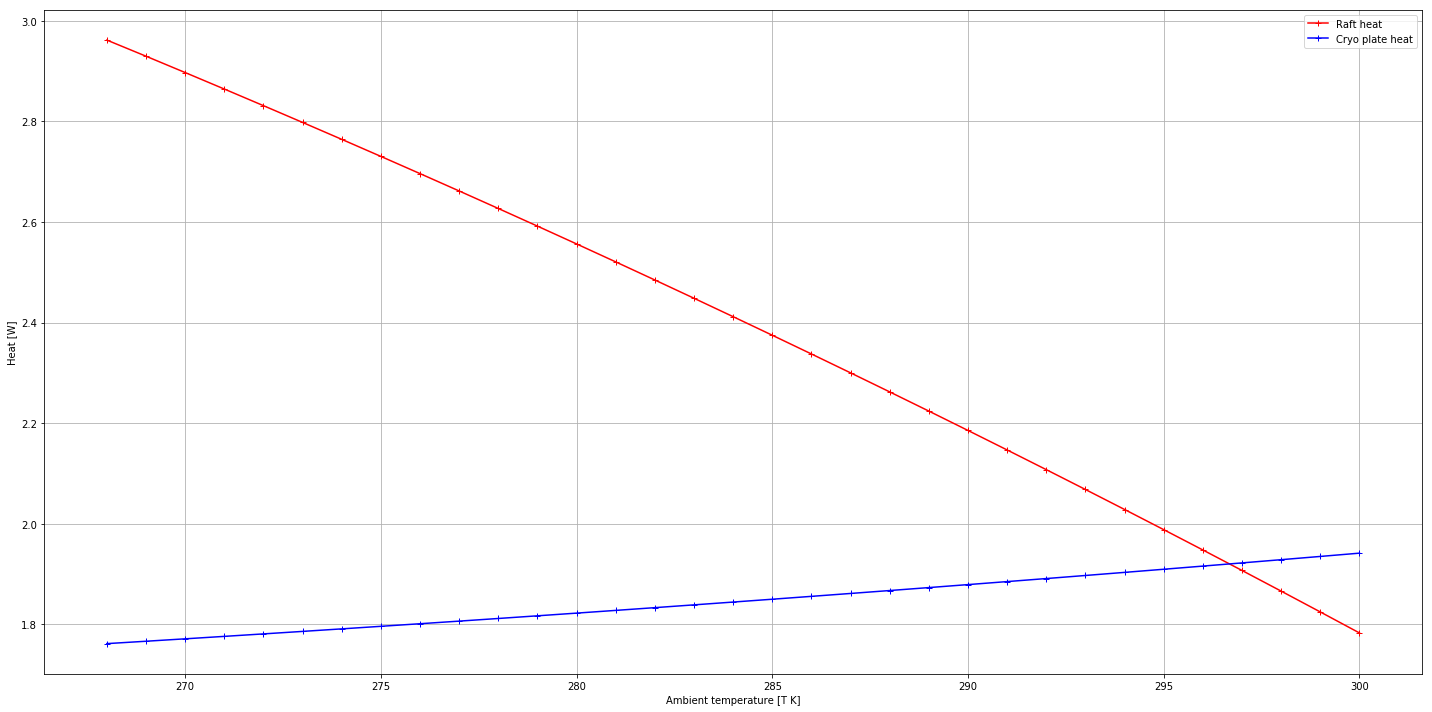

Node ut1#hi8: 144.6 V
Node ut1#lo7: 144.7 V
Node ut1#hi7: 144.5 V
Node ut1#lo6: 144.8 V
Node ut1#hi6: 144.4 V
Node ut1#lo5: 144.9 V
Node ut1#hi5: 144.3 V
Node ut1#lo4: 144.9 V
Node ut1#hi4: 144.3 V
Node ut1#lo3: 145.0 V
Node ut1#hi3: 144.2 V
Node ut1#lo2: 145.0 V
Node ut1#hi2: 144.2 V
Node ut1#lo1: 145.0 V
Node ut1#hi1: 144.2 V
Node ut2#hi8: 270.2 V
Node ut2#lo7: 269.7 V
Node ut2#hi7: 270.6 V
Node ut2#lo6: 269.4 V
Node ut2#hi6: 271.0 V
Node ut2#lo5: 269.2 V
Node ut2#hi5: 271.2 V
Node ut2#lo4: 269.1 V
Node ut2#hi4: 271.3 V
Node ut2#lo3: 269.0 V
Node ut2#hi3: 271.4 V
Node ut2#lo2: 268.9 V
Node ut2#hi2: 271.4 V
Node ut2#lo1: 268.9 V
Node ut2#hi1: 271.5 V
Node ut3#hi8: 150.4 V
Node ut3#lo7: 150.8 V
Node ut3#hi7: 150.1 V
Node ut3#lo6: 151.0 V
Node ut3#hi6: 149.8 V
Node ut3#lo5: 151.1 V
Node ut3#hi5: 149.7 V
Node ut3#lo4: 151.2 V
Node ut3#hi4: 149.6 V
Node ut3#lo3: 151.3 V
Node ut3#hi3: 149.5 V
Node ut3#lo2: 151.3 V
Node ut3#hi2: 149.5 V
Node ut3#lo1: 151.4 V
Node ut3#hi1: 149.4 V
Node ut4#h

In [8]:
# %load MainCryo.py
#!/usr/bin/env python

"""
The cryo circuit starts with the sensors and the heat sources
connected to the sensors and runs through the raft base plates,
the thermal straps, the REC box sides to the cryo plate,
where the heat is removed by the cryo refrigerator evaporator
loops. The schematic for this circuit is shown in Fig. 1.
Material is represented by the transmission lines, TLURC8.
TLURC stands for lumped RC transmission. The 8 indicates that
the overall capacitance and resistance has been divided into
8 pieces. Most of the resistors represent thermal-contact
impedances. R7 represents the flex cables (all of them in one
RTM) connecting the sensors to the REBs (all three of them in
an RTM).  PID and PID2 are the proportional-integral
controllers, which regulate the temperatures of the sensors
and the cryo plate respectively by controlling heaters G1
and G2. 

"""

__author__ = "Hervé Grabas"
__email__ = "herve.grabas@gmail.com"

import os
import csv
import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Unit import *

import LSSTparams as par

os.environ['PySpiceLogLevel']="ERROR"

class PI(SubCircuitFactory):
  __name__ = 'PI'
  __nodes__ = ('In+', 'In-','Out', 'K=1','KI=1','AWG=1','MINV=1','MAXV=1')
  
  def __init__(self):
    super().__init__()
    self.BehavioralSource(1,'prop'    ,self.gnd,voltage_expression ='{K}*(V(In+)-V(In-))')
    self.BehavioralSource(2,'sum'     ,self.gnd,voltage_expression ='V(prop)+V(integ)')
    self.BehavioralSource(3,'overfl'  ,self.gnd,voltage_expression ='{AWG}*(V(Out)-V(sum))')
    self.BehavioralSource(4,'antiwind',self.gnd,voltage_expression ='V(overfl)+V(prop)')
    self.BehavioralSource(5,'Out'     ,self.gnd,voltage_expression ='V(sum) < {MINV} ? {MINV} : V(sum) > {MAXV} ? {MAXV} : V(sum)')
    
    #integrator part - fixme with int model from NGSpice?
    #circuit.raw_spice += 'R2 out 0 1kOhm'
    self.VoltageControlledCurrentSource(1,self.gnd,'integ','antiwind',self.gnd,transconductance='{KI}')
    self.C(1,'integ',self.gnd,1)
    self.R(1,'integ',self.gnd,10000000) 

class BoltzmannSurface(SubCircuitFactory):
  __name__ = 'BoltzmannSurface'
  __nodes__ = ('In','Out','Gain=1','Rin=1','VMIN=0','VMAX=1')
  
  def __init__(self):
    super().__init__()
    self.R(1,'In','Out','{Rin}')
    self.BehavioralSource(1,'V+' ,self.gnd,voltage_expression ='V(In) < {VMIN} ? {VMIN} : V(In) > {VMAX} ? {VMAX} : V(In)')
    self.BehavioralSource(2,'V-' ,self.gnd,voltage_expression ='V(Out) < {VMIN} ? {VMIN} : V(Out)> {VMAX} ? {VMAX} : V(Out)')
    self.BehavioralSource(3,'vp+',self.gnd,voltage_expression ='POW(V(V+),4)')
    self.BehavioralSource(4,'vp-',self.gnd,voltage_expression ='POW(V(V-),4)')
    self.VoltageControlledCurrentSource(1,'In','Out','vp+','vp-',transconductance='{Gain}')

circuit = Circuit("MainCryo")

#PI regulators
circuit.subcircuit(PI())
circuit.X(1,'PI','CCDSetPoint'  ,'L3_CCD'   ,'HeaterCtrl'    ,K=par.KG1,KI=par.KIG1,AWG=par.AWG1,MINV=par.MING1,MAXV=par.MAXG1)
circuit.X(2,'PI','PlateSetPoint','CryoPlate','PlateCtrl'     ,K=par.KG2,KI=par.KIG2,AWG=par.AWG2,MINV=par.MING2,MAXV=par.MAXG2)
circuit.X(3,'PI','ColdSetPoint' ,'ColdBAR'  ,'ColdHeaterCtrl',K=par.KG3,KI=par.KIG3,AWG=par.AWG3,MINV=par.MING3,MAXV=par.MAXG3)

#Heater functions
circuit.VoltageControlledCurrentSource(1,circuit.gnd,'HeaterOut','HeaterCtrl'    ,circuit.gnd,transconductance=par.Heater_gain)
circuit.VoltageControlledCurrentSource(2,circuit.gnd,'PlateIn'  ,'PlateCtrl'     ,circuit.gnd,transconductance=par.Cryo_gain)
circuit.VoltageControlledCurrentSource(6,circuit.gnd,'ColdPlate','ColdHeaterCtrl',circuit.gnd,transconductance=par.Cold_transcd)

#Behavioral models
circuit.BehavioralSource(1,circuit.gnd,'Heatercurrent',current_expression='4*SQRT(MAX(V(HeaterCtrl)*(2.01-V(HeaterCtrl)),0))')

circuit.NonLinearCurrentSource(3,'PlateIn'  ,circuit.gnd,expression='V(PlateIn, 0)'  ,table=par.Cryo_table)
circuit.NonLinearCurrentSource(7,'ColdPlate',circuit.gnd,expression='V(ColdPlate, 0)',table=par.Cold_table)

#Emissive surface models
circuit.subcircuit(BoltzmannSurface())
circuit.X(4,'BoltzmannSurface','L3_CCD'    ,'LensBack'      ,Gain=par.LensGainBack   ,Rin=par.Rback  ,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)
circuit.X(5,'BoltzmannSurface','Ambient'   ,'LensFront'     ,Gain=par.LensGainFront  ,Rin=par.Rfront ,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)
circuit.X(6,'BoltzmannSurface','Ambient'   ,'ShroudFront'   ,Gain=par.ShroudGainFront,Rin=par.RShroud,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)
circuit.X(7,'BoltzmannSurface','ShroudBack','CryoGridShroud',Gain=par.ShroudGainBack ,Rin=par.RShroud,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)
circuit.X(8,'BoltzmannSurface','REBRAD'    ,'BoxRAD'        ,Gain=par.RebGain        ,Rin=par.RebRes ,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)
circuit.X(9,'BoltzmannSurface','ColdPlate' ,'CryoPlate'     ,Gain=par.GridGain       ,Rin=par.GridR  ,VMIN=par.SurfLimMin,VMAX=par.SurfLimMax)

#Lumped resistivity elements
circuit.UniformDistributedRCLine('T1' ,'CryoPlate'     ,'PlateIn'       ,circuit.gnd,model='T1' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T2' ,'T28out'        ,'CurrentSource' ,circuit.gnd,model='T2' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T3' ,'BoxIn'         ,'BoxRAD'        ,circuit.gnd,model='T3' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T4' ,'StrapIn'       ,'StrapOut'      ,circuit.gnd,model='T4' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T5' ,'Flex_lumped'   ,'HeaterOut'     ,circuit.gnd,model='T5' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T6' ,'L3_CCD'        ,'Flex_entry'    ,circuit.gnd,model='T6' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T7' ,'LensBack'      ,'LensFront'     ,circuit.gnd,model='T7' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T8' ,'CurrentSource' ,'T29out'        ,circuit.gnd,model='T8' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T9' ,'T29out'        ,'CurrentASPIC'  ,circuit.gnd,model='T9' ,length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T10','CurrentASPIC'  ,'REBRAD'        ,circuit.gnd,model='T10',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T11','REBRAD'        ,'CABACcurrent'  ,circuit.gnd,model='T11',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T12','CABACcurrent'  ,'PassCryoIn'    ,circuit.gnd,model='T12',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T13','PassCryoIn'    ,'ColdBAR'       ,circuit.gnd,model='T13',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T14','T29out'        ,'ColdBAR'       ,circuit.gnd,model='T14',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T15','ColdBAR'       ,'ADCcurrent'    ,circuit.gnd,model='T15',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T16','FPGAIn'        ,'ColdBAR'       ,circuit.gnd,model='T16',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T17','ADCcurrent'    ,'DiffAmpcurrent',circuit.gnd,model='T17',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T18','ColdStrapIn'   ,'ColdPlate'     ,circuit.gnd,model='T18',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T20','DiffAmpcurrent','Heatercurrent' ,circuit.gnd,model='T20',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T21','Heatercurrent' ,'FPGAIn'        ,circuit.gnd,model='T21',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T22','FPGAIn'        ,'FPGAcurrent'   ,circuit.gnd,model='T22',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T23','FPGAcurrent'   ,'REBDAQ'        ,circuit.gnd,model='T23',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T24','BoxRAD'        ,'BoxOut'        ,circuit.gnd,model='T24',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T25','ShroudBack'    ,'ShroudFront'   ,circuit.gnd,model='T25',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T26','CryoGridShroud','CryoPlate'     ,circuit.gnd,model='T26',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T27','GridFront'     ,'GridBack'      ,circuit.gnd,model='T27',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T28','REBCCD'        ,'T28out'        ,circuit.gnd,model='T28',length=1,number_of_lumps=8)
circuit.UniformDistributedRCLine('T29','T28out'        ,'T29out'        ,circuit.gnd,model='T29',length=1,number_of_lumps=8)

#Heat generators
circuit.I(1,circuit.gnd,'CurrentSource' ,par.CurrSrccurrent)
circuit.I(2,circuit.gnd,'CurrentASPIC'  ,par.ASPICcurrent)
circuit.I(3,circuit.gnd,'CABACcurrent'  ,par.CABACcurrent)
circuit.I(4,circuit.gnd,'ADCcurrent'    ,par.ADCcurrent)
circuit.I(5,circuit.gnd,'DiffAmpcurrent',par.DiffAmpcurrent)
circuit.I(6,circuit.gnd,'Heatercurrent' ,par.Heatercurrent)
circuit.I(7,circuit.gnd,'FPGAcurrent'   ,par.FPGAcurrent)
circuit.I(8,circuit.gnd,'L3_CCD'        ,par.CCD_DC_current)

#Temperature sources and set points
circuit.V(1,'Ambient'      ,circuit.gnd,par.TA)
circuit.V(2,'PlateSetPoint',circuit.gnd,par.Cryo_temp)
circuit.V(3,'ColdSetPoint' ,circuit.gnd,par.ColdTemp)
circuit.V(4,'CCDSetPoint'  ,circuit.gnd,par.CCD_temp)

#Contact resistors
circuit.R(1 ,'BoxOut'    ,'CryoPlate'  ,'{F*'+str(par.R1V)+'}')
circuit.R(3 ,'StrapOut'  ,'BoxIn'      ,'{F*'+str(par.R3V)+'}')
circuit.R(4 ,'HeaterOut' ,'StrapIn'    ,'{F*'+str(par.R4V)+'}')
circuit.R(5 ,'Flex_entry','Flex_lumped','{FC*'+str(par.R5V)+'}')
circuit.R(6 ,'REBDAQ'    ,'Ambient'    ,par.R6V)
circuit.R(7 ,'Flex_entry','REBCCD'     ,par.R7V)
circuit.R(15,'Ambient'   ,'GridFront'  ,par.R15V)
circuit.R(16,'ColdBAR'   ,'ColdStrapIn',par.R16V)
circuit.R(18,'HeaterOut' ,'REBCCD'     ,par.R18V)
circuit.R(19,'Ambient'   ,'CryoPlate'  ,par.R19V)

#Capacitor
circuit.C(1,'ColdPlate',circuit.gnd,par.ColdPlateCap)

circuit.G1.output_minus.add_current_probe(circuit)
circuit.G2.output_minus.add_current_probe(circuit)
circuit.G6.output_minus.add_current_probe(circuit)

circuit.parameter('F=1','F=1') ##TODO report bad implementation 
circuit.parameter('FC={SQRT(F)}','F={SQRT(F)}') ##TODO report bad implementation 

#Lumped models created from .csv file - good practice to avoids errors
with open('LumpedValues.csv') as csvfile:
  reader = csv.DictReader(csvfile, delimiter='\t')
  for row in reader:
    circuit.model(row['Reference'],'URC',RPERL=row['R(Ohms)'],CPERL=row['C(F)'])

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.options(GMINSTEPS=10,GMIN=1e-18,PIVTOL=1e-15)

analysis = simulator.dc(V1=slice(268,300,1))

#analysis2 = simulator.dc(F=slice(0.1,10,1))
analysis2 = simulator.operating_point()

#Saving the SPICE netlist into a file
f1 = open('./maincryo.sp', 'w')
print(str(circuit), file=f1)
f1.close

# Fixme: current over resistor
#for node in analysis.branches.values():
#    print('Node {}: {:5.2f} A'.format(str(node), float(node))) # Fixme: format value + unit

print("Branches names:")
print(analysis.branches.keys())

figure = plt.figure(1, (20, 10))
axe = plt.subplot(111)
plt.grid()
axe.plot(analysis.ambient, -analysis.vg1_output_minus, 'r-+')
axe.plot(analysis.ambient, -analysis.vg2_output_minus, 'b-+')
axe.set_xlabel('Ambient temperature [T K]')
axe.set_ylabel('Heat [W]')
plt.legend(('Raft heat', 'Cryo plate heat'))
plt.tight_layout()
plt.show()


for node in analysis2.nodes.values():
    print('Node {}: {:4.1f} V'.format(str(node), float(node)))
#    
#for node in analysis.branches.values():
#    print('Node {}: {:5.2f} A'.format(str(node), float(node))) # Fixme: format value + unit